# Solar wind modeling : Introduction


### First insights of an existing solar wind
The solar corona is the outer shell of the solar atmosphere, where the solar wind is generally
assumed to "birth". The corona extends from just beyond the transition region to a few solar
radii (∼ 3 $r_\odot$, Aschwanden et al., 2001).

The first models of the solar atmosphere assumed, by analogy with that of the Earth’s, an
isothermal atmosphere in hydrostatic equilibrium (van de Hulst, 1953). However, solar coronal
observations obtained during solar eclipses revealed that the temperature decreases with radial
distance (Chapman et Zirin, 1957) leading to some first non-isothermal hydrostatic models. 
The latter required however too large estimated coronal temperatures,
and a density that tended to infinity at infinite heliocentric radial distance (Chapman 1961).
The hydrostatic equilibrium solution was therefore inappropriate. In addition, the Biermann
(1957) work on comet observations, stated that the acceleration of the ions tails of comets has
been recognized to be due to the interaction between corpuscular radiation of the Sun (i.e.
protons, electrons or atoms), and the tail plasma.

### Parker's isothermal solar wind

In the same framework as stellar accretion hydrodynamic equations, Parker (1958) and Parker (1960a) 
laid the groundwork for non-hydrostatic modeling of
the solar corona, assuming a stationary hydrodynamic flow and a isothermal evolution. Parker
(1958) stated that the corona should be in thermal expansion escaping the gravitational field
of the Sun at supersonic speeds into the interplanetary medium, leading the solar wind to be driven by the competition between the gradient in thermal pressure and the
gravitational force, and resulting in a net motion of the plasma such as : 

\begin{align}
n \: m_p \: u \: \frac{du}{dr} = - \frac{dP}{dr} - n \: m_p \: \frac{G M}{r^2}    \qquad \qquad    (1)
\end{align}

where $n$ the density, $u$ the wind bulk speed, $P$ the thermal pressure, $M$ the solar mass, $m_p$ the proton mass and $G$ the gravitational constant. The success of the [Parker 1958](https://ui.adsabs.harvard.edu/abs/1958ApJ...128..664P/abstract) isothermal transonic solution came from direct observations of
solar wind bulk velocity, temperature, and density (Neugebauer et Snyder, 1966), supporting the
predictions obtained by the transonic solution.

### Let's analytically solve Parker's isothermal momentum equation :

----------------------------------
- **Question 1 :** 
Using, in complement of Equation (1), the mass flux conservation equation :
\begin{align}
n \: u \: r^2 \: = \: C  \qquad \qquad    (2)
\end{align}

and an isothermal thermal closure for the pressure :
\begin{align}
P \: = \: n \: k_B \: T  \qquad \qquad    (3)
\end{align}

where $k_B$ is the Boltzamann constant, $C$ a constant, **express the bulk speed of the wind $u(r)$** (injecting (2) and (3) into (1)), in function of the radial distance $r$, the sound speed $c_s^2 = \frac{k_B T}{m_p}$ and the critical radius $r_c = \frac{G \:M}{2 \:c_s^2}$ and retrieve the above expreesion :

\begin{align}
\bigg( 1 - \frac{c_s^2}{u^2} \bigg) \frac{du}{dr} = \frac{2 c_s^2}{u r} \bigg( 1 - \frac{r_c}{r} \bigg) \qquad \qquad (4)
\end{align}


- **Question 2 :** Considering that we want to determine the wind speed radial evolution, examine the poles and zeros of the Equation (4) after expressing $\frac{du}{dr}$. What is the required condition to guarantee a transonic wind solution ?



----------------------------------




### Alternative solar wind solutions
Within the years, more complex modeling (multifluid, MHD, kinetic..) have improved significantly the description of the solar wind, accounting for more realistic assumptions and plasma behvaior, matching better the remote and in-situ observations (Helios, Wind, Stereo, Ace, Parker Solar Probe, Solar Orbiter, ...). However the cost of computation increase with the precision, making the "simple" models diverging stronger from observations in general.



# 0) Context and objectives : Theroy VS Observations



## Statistical wind properties (Section 1 - 3)
As additional reference values for the overall wind radial evolution (statistical point of view), we will also refer to the wind speed population of [Dakeyo et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022ApJ...940..130D/abstract), providing the bulk speed $u$, proton temperature $T_p$, electron temperature $T_e$ and density $n_e$. These profiles represent 5 differents wind populations evolution of different 1au speed : 
**A = 350 km/s,   B = 400 km/s,   C = 450 km/s,   D = 550 km/s  and  E = 650 km/s**. 



## Remote sensing wind properties (Section 1 - 4)
Remote sensing observations of the coronal density can be estimated from the spectroscopic observations of [Bemporad (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...846...86B/abstract). Others remote observations from [Cranmer (2002)](https://ui.adsabs.harvard.edu/abs/2002SSRv..101..229C/abstract) and [Cranmer (2020)](https://ui.adsabs.harvard.edu/abs/2020RNAAS...4..249C/abstract) provides intervals of bulk speed, proton and eletron temperature of the wind in the corona. 





In [1]:
# Importation required to run this code
import bipoly_solar_wind_solve_and_plot as bpsw
import bipoly_solar_wind_solve_and_multiplot as mbpsw
import streamline_calc_dakeyo2024a as stream 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Loading in-situ observations from HELIOS and PSP
data_insitu = np.loadtxt('HELIOS_PSP_med_profile_5_vents_r_v_Tp_Te_ne.txt')
data_insitu[data_insitu==0] = np.nan

# Observations per wind populations
nb_vent = 5
r_data = data_insitu[:, 0]
u_data = data_insitu[:, 1 : nb_vent + 1] 
Tp_data = data_insitu[:, 1*nb_vent +1: 2*nb_vent +1]
Te_data = data_insitu[:, 2*nb_vent +1: 3*nb_vent +1]
n_data = data_insitu[:, 3*nb_vent +1: 4*nb_vent +1]


# All observations resize together
ns = nb_vent * len(r_data) 
r_data_all = r_data.copy()
u_data_all = np.resize(u_data.T, (ns))
Tp_data_all = np.resize(Tp_data.T, (ns))
Te_data_all = np.resize(Te_data.T, (ns))
n_data_all = np.resize(n_data.T, (ns))
for i in range(nb_vent-1):
    r_data_all = np.concatenate((r_data_all, data_insitu[:, 0]))
                   
data_all = np.column_stack((r_data_all , u_data_all, n_data_all, Tp_data_all, Te_data_all))


#########################################
# Plotting option 
plot_f = False
plot_gamma = False

plot_unT = True
plot_energy = False
plot_data = True
#########################################

# Hands on the code : 1) Isothermal Parker Solar Wind
As the first modeling step, we numerically solve Equation (4) and plot the isothermal Parker solar wind solutions where we set one free parameter $T_0 = T_p = T_e = (T_p + T_e)/2$, the average coronal temperature, which is constant with radius out to infinity [(Parker 1958)](https://ui.adsabs.harvard.edu/abs/1958ApJ...128..664P/abstract).

------------------------------------

**Plotting options** : The plot options let the user choose which output quantity to display: f, gamma_p and gamma_e, a subplot with u, n, Tp and Te, the energy contributions, and the in-situ/remote observations from the reference described in Section 0. 

We do not consider for now the expansion factor influence (fm =1), do not pay attention to the gray shaded area for now.

------------------------------------

-
**<u>Question 1</u> :** Considering a monofluid solution with $T_0 = (T_p +T_e)/2$, what is the coronal temperature required to model a slow (350 km/s), medium (500 km/s) and fast solar wind (650 km/s) at 1 au (215 $r_\odot$) with the isothermal assumption ? Plot all the three speed curves on the same graph.
-
**<u>Question 2</u> :** What are the approximate locations of the sonic point for these three solutions? Comment on how the critical radius moves with respect to the coronal temperature.
-
**<u>Question 3</u> :** How closely do the 1au modeled temperatures match the typical in-situ observations made at the same distance (Dakeyo et al. 2022)?
What does this tell us about the modeling limitations and/or the actual physical evolution of the plasma ?

-
**<u>Question 4</u> :** How far the coronal modeled densities are from the remote sensing observations (Cranmer 2002) ?
What does this tell us about the modeling limitations and/or the actual physical evolution of the plasma ?



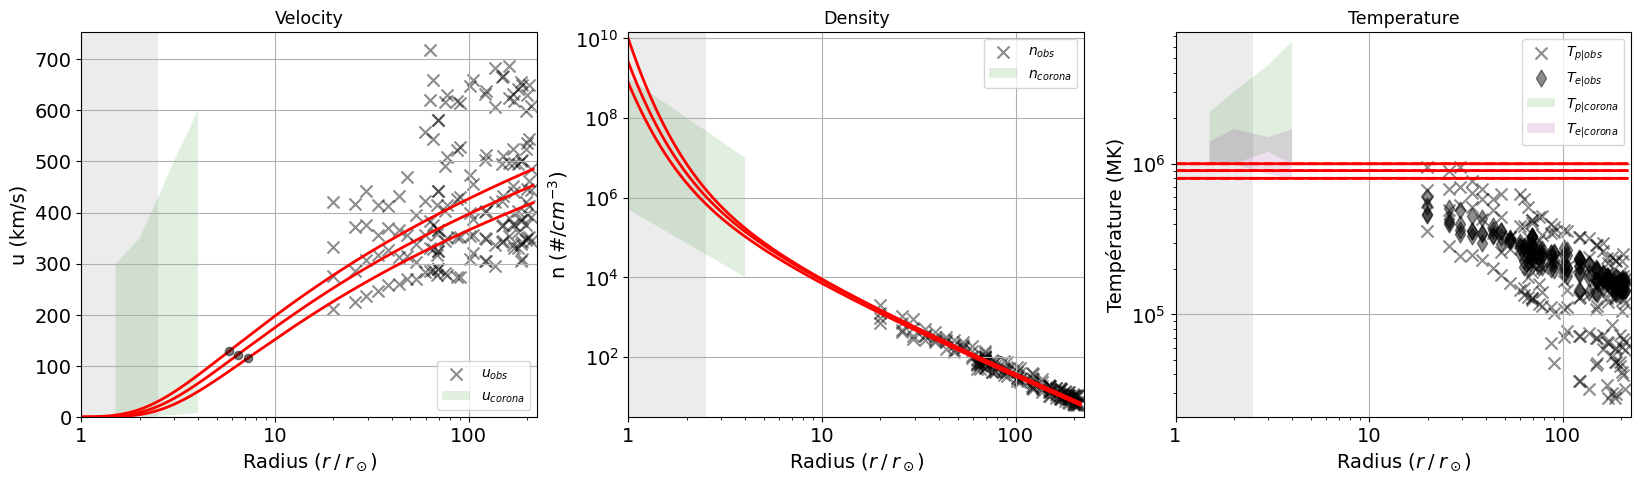

In [2]:
# Plot all the three speed curves on the same graph: EXAMPLE
####################################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves)) 
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [0.8e6, 0.9e6, 1e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [float('inf'), float('inf'), float('inf')]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii


###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

## 2) Polytropic Solar Wind (monofluid)

The isothermal assumption has raised the physical problem of an infinite deposit of
energy when the model is extended to larger distances, which is non physical. This
limitation can be overcome by considering a polytropic evolution with $P \propto n^\gamma$, with $\gamma$ the
polytropic index (independent of r and for which $1 < \gamma < 5/3$), solving the equations similarly. The input temperature of the model is now set at the critical radius only with $T_c = T(r_c)$, where the resolution starts. 

Here we still solve a monofluid wind solution, considering this time a polytropic evolution of the plasma according to a given $\gamma$ value. 

-
**<u>Question 1</u> :** Considering a fixed value of $T_c = 2$MK at the critical radius, what is the effect of $\gamma > 1$ on the plasma speed, density, and temperature evolution (restrict to $1<\gamma<1.4$ for now). Find the $\gamma$ value that sets the regime of solar wind existence (i.e. no acceleration). 

-
**<u>Question 2</u> :** 
Taking an average $\gamma = 1.45$ which is observed for protons from _HELIOS_ mission (Maksimovic et al. 2020), determine the maximal speed that can be reached increasing step by step the temperature (from 1 MK to 3.5 MK). Plot on the same graph the three solutions showing the evolution of $r_c$ with increasing $T_c$. Comment the coronal temperature and the critical radius location. 

-
**<u>Question 3</u> :** What are the main limits of the polytropic approach when comparison theory to measurements ? Propose a possible ways to overcome the polytropic modeling inconvenients.

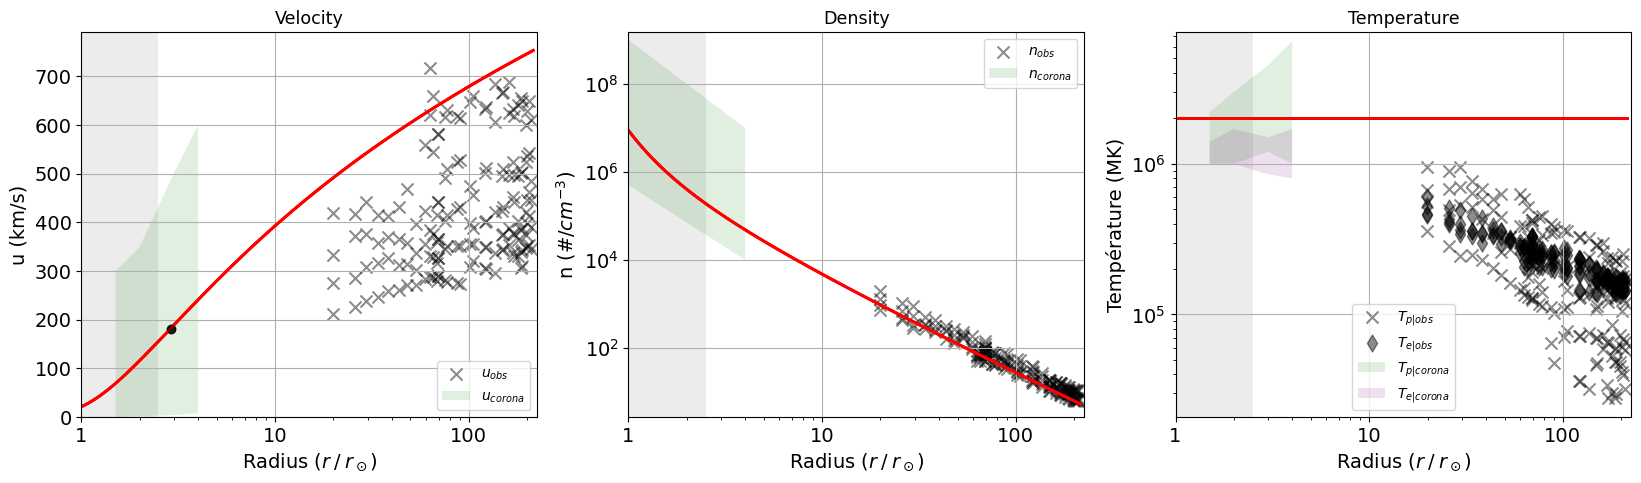

In [3]:
# Importation required to run this code
import bipoly_solar_wind_solve_and_multiplot as mbpsw
#########################################
# Inputs of the model : Isopoly 
#########################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1.0, 1.0, 1.0]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [2e6, 2e6, 2e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [float('inf'), float('inf'), float('inf')]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################


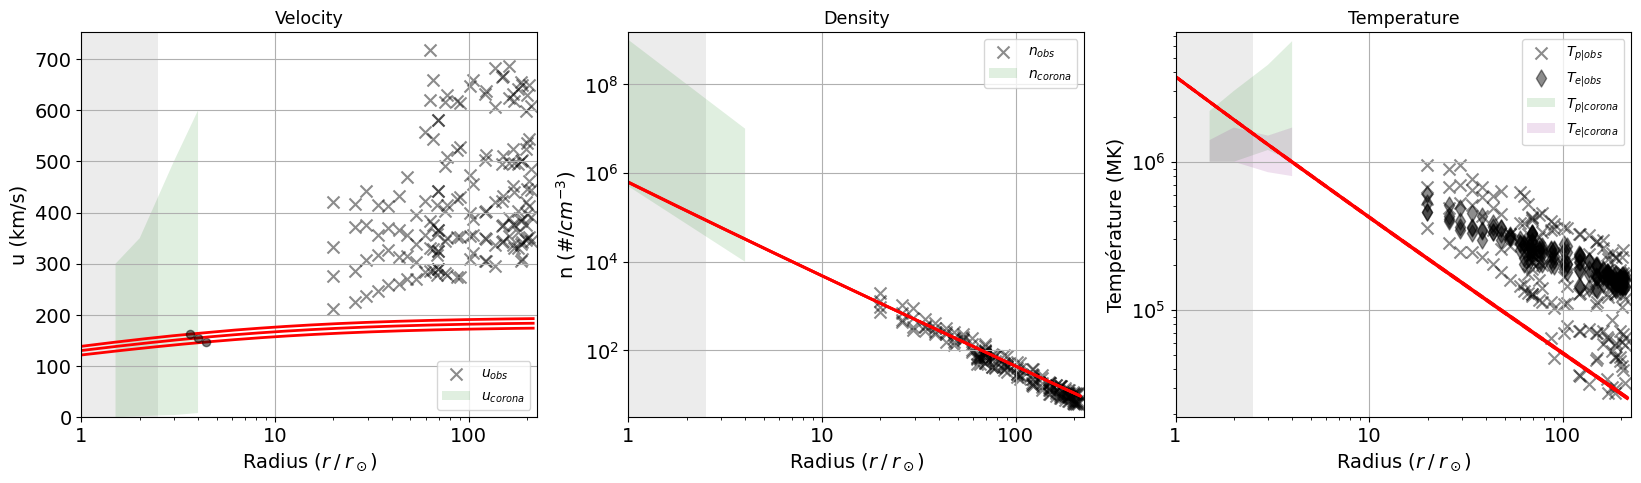

In [4]:
# Importation required to run this code
import bipoly_solar_wind_solve_and_multiplot as mbpsw
#########################################
# Inputs of the model : Isopoly 
#########################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1.45, 1.45, 1.45]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [0.9e6, 1e6, 1.1e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [float('inf'), float('inf'), float('inf')]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################


## 3.1) Isopoly Solar Wind (monofluid)

The polytropic approach struggle to reproduce both the bulk speed and the temperature as well as the isothermal one. Therefore, while Parker (1958) provides a good base for modeling
of the solar wind, a change in the thermal closure needs to be done to better describe the observed wind evolution. To improve the modeling, we now consider a class of twofluid models, called Isopoly [Dakeyo et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022ApJ...940..130D/abstract), that is a Parker's like model, based on the same state equations, but separating the plasma evolution into two distinc thermal regimes. 

For the next step, the wind solution is still considered monofluid, but with a two thermal regime evolution. The plasma is isothermal below r_iso, then polytropic above this last according to a given $\gamma$ value.

-
**<u>Question 1</u> :** Taking the average value of $\gamma = 1.45$, what is the average isopoly coronal temperature required to reproduce slow (350 km/s), medium (500 km/s) and fast solar wind (650 km/s) at 1 au (215 rs) with the monofluid isopoly (fit veru roughly the proton average temperature distribution). Plot all the solutions on the same graph.

-
**<u>Question 2</u> :** Considering the 500 km/s wind fitted right before, varying only $\gamma$ value (fix the other parameters), what is the effect on the 1au speed and on the temperature ? What type of wind require the more heating (i.e. smaller $\gamma$ value) ? 

-
**<u>Question 3</u> :** Varying only $r_{iso}$ value (fix the other parameters) what is the dependence of the $r_{iso}$ value with the 1au speed ? How is that can be interpreted in term of thermodynamics changes with radial distance for the plasma ? 

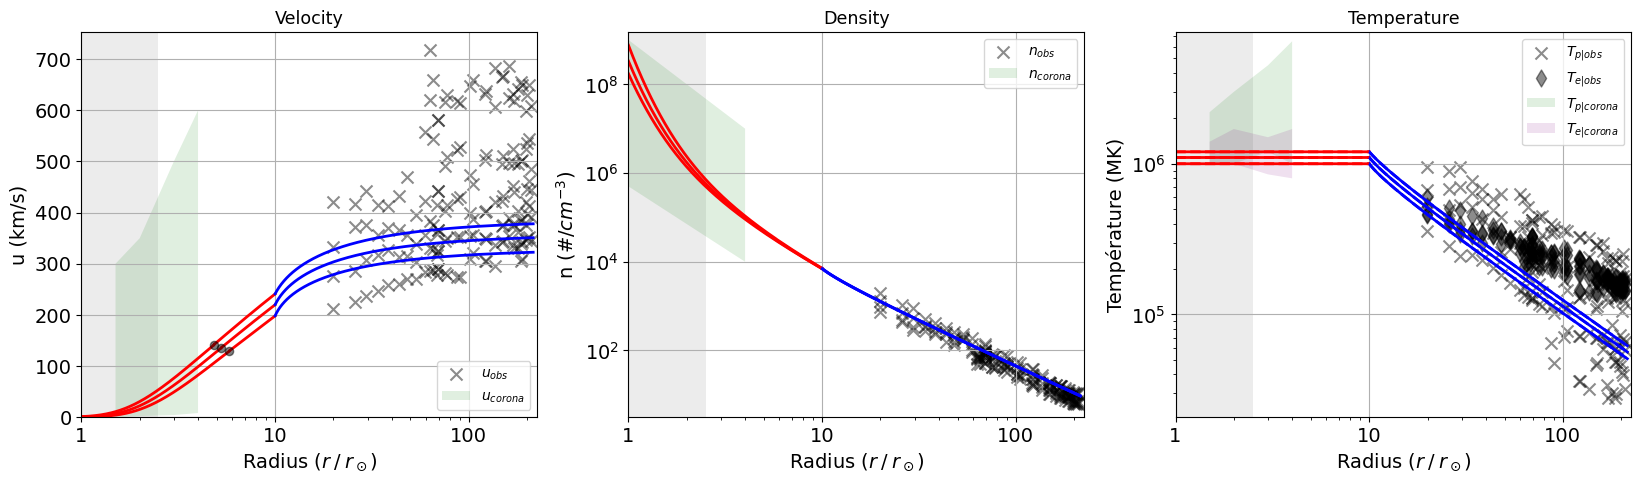

In [5]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = [1.45, 1.45, 1.45]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [1e6, 1.1e6, 1.2e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [10, 10, 10]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

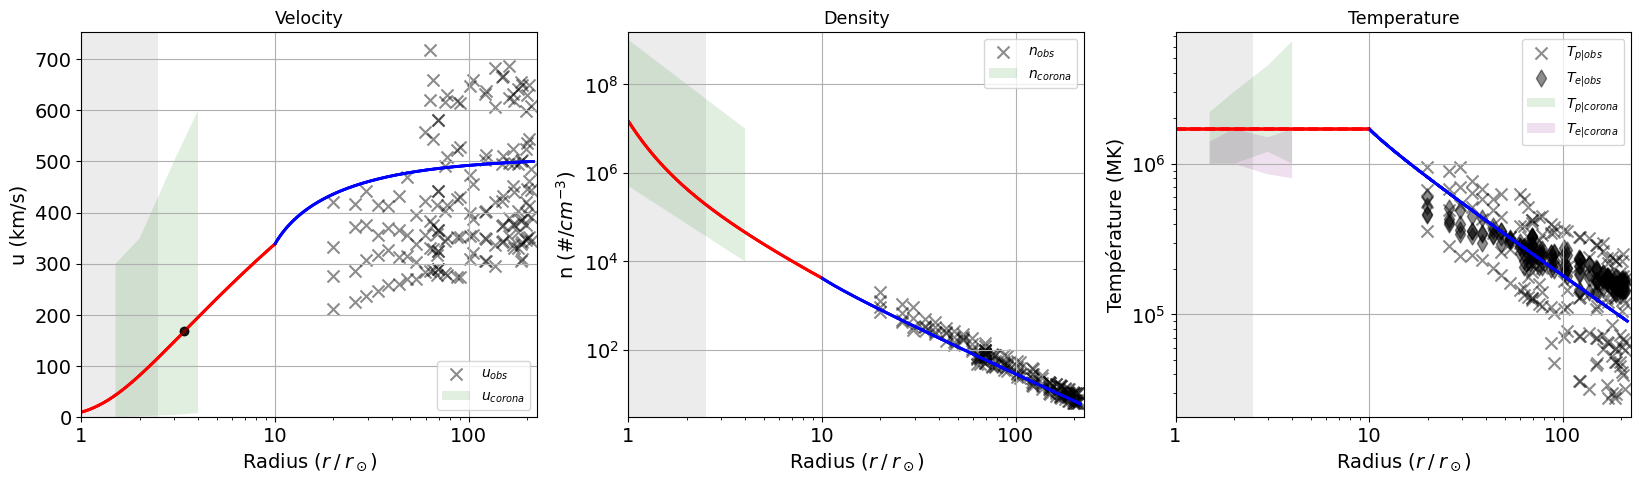

In [6]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = [1.45, 1.45, 1.45]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [1.7e6, 1.7e6, 1.7e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [10, 10, 10]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

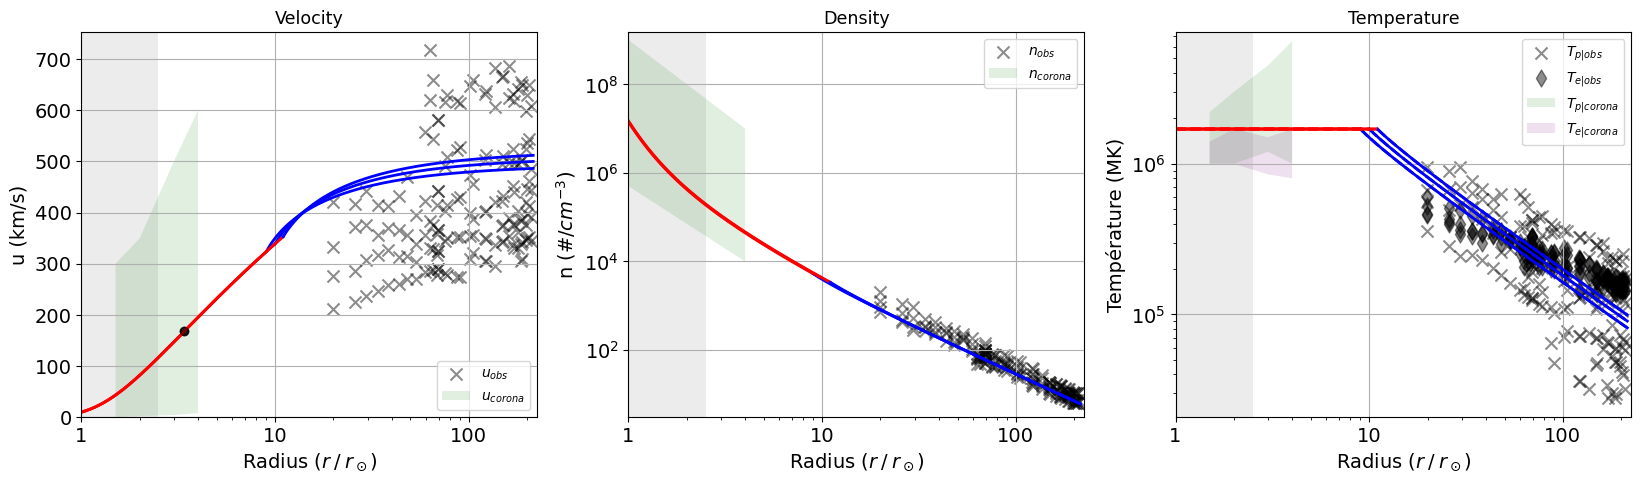

In [7]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 3
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = [1.45, 1.45, 1.45]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = [1.7e6, 1.7e6, 1.7e6]
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = [9, 10, 11]
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = np.ones((nb_curves))
r_exp = np.ones((nb_curves))          # in solar radii
sig_exp = np.ones((nb_curves))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

## 3.2) Isopoly Solar Wind (twofluid)
We now consider a two-fluid wind modeling, for which the thermal behavior of the protons and electrons are decoupled. This means that for the input have a set of $\gamma, T_0, r_{iso}$ for protons and electrons. 
As long as the solar wind goes supersonic inside the isothermal region ($r < r_{iso|p}$ and $r < r_{iso|e}$) and remains supersonic across the sound speed crossing at the isothermal-polytropic boundary, then accelerating transonic solution exists for $r \rightarrow \infty$.

-
**<u>Question 1</u> :** Starting from the parameters fitted in Section 3.1) and with $\gamma_e \approx 1.25$ (Maksimovic et al. 2020), use a twofluid isopoly to reproduce slow (350 km/s), medium (500 km/s) and fast solar wind (650 km/s) at 1 au (215 rs) fiting roughly the observations for temperature observations for protons and electrons. As for previous section, plot the 3 solutions on the same graph. What are the required $T_{p0}$ & $T_{e0}$ for the three different solutions ? 
-
**<u>Question 2</u> :** What can you tell about the partition of thermal energy in the plasma between protons and electrons close and far from the Sun ? Regarding the different wind speed, what populations carry the major part of the thermal energy ? Is the heating similar between protons and electrons in the polytropic regime (far from the Sun) ? 



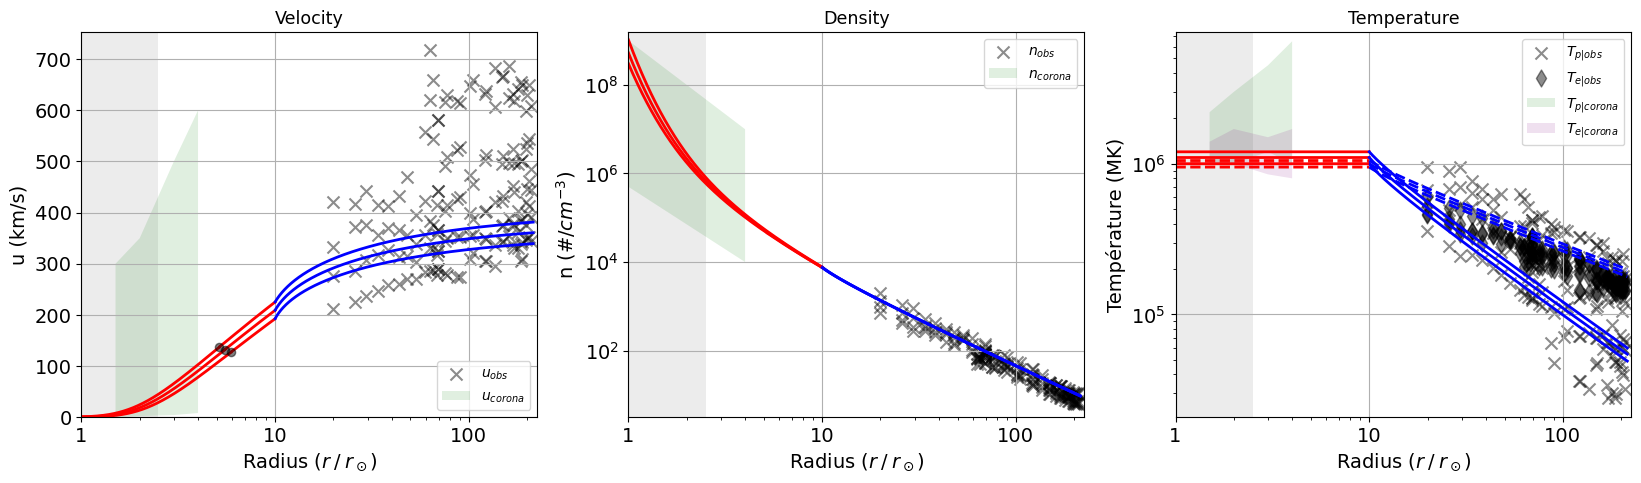

In [8]:
# Plot all the three speed/temperature curves on the same graph.
####################################################

# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_e_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = [1.45, 1.45, 1.45]
gamma_e_vals[:,1] = [1.25, 1.25, 1.25]

# Coronal temperature (in Kelvin)
Tpc = [1e6, 1.1e6, 1.2e6]
Tec = [0.95e6, 1e6, 1.05e6]

# Isothermal radius (in solar radii)
r_iso_p = [10, 10, 10]
r_iso_e = [10, 10, 10]

# Expansion factor parameters
fm = np.ones((3))
r_exp = np.ones((3))          # in solar radii
sig_exp = np.ones((3))       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

## 3.3) Super-expansion of magnetic flux tube : f-subsonic and f supersonic solutions 

Due to the spherical geometry of the Sun, the magnetic field lines (i.e. magnetic flux tubes), expand spherically with an increasing section going outward the Sun. However in the corona above heights where the loops are fully closed, the "void" in magnetic pressure left by these last has to be filled up by the open magnetic field lines. This leads to a lateral super-expansion of the magnetic field. This can be characterized by the expansion factor :

\begin{align}
f = \frac{B_r(r_\odot) \: r_\odot^2}{B_r(r) \: r^2}
\end{align}

which express the deviation to the expected spherical expansion (Kopp & Holzer 1976). Because of the "frozen-in" properties of the plasma, this super-expansion affects the wind radial evolution. The larger $f$, the larger the expansion. Moreover, all the solutions presented previously can be declined in both "f-subsonic" and "f-suersonic" type of solution, depending the influence of the expansion factor profile ([Dakeyo et al. 2024b](https://arxiv.org/abs/2408.06155)) :

* "_f-subsonic_" solutions : are the more commonly shown in solar wind modeling and space weather (the ones used until now in this pratical work), for which in the super-expansion region in the low corona, the wind is fully subsonic ($u < c_s$ for $r < r_{ss}$).  
    
* "_f-supersonic_" solutions : The f-supersonic solutions are known, but less used in solar wind until recently. They induce a rapidly accelerating solar wind solution with a critical radius very close to the Sun inside the super-expansion region, ranging between 1 and $\sim$ 3 $r_\odot$, for coronal temperatures of the order of 0.5 - 3 MK. They also induce a deceleration region, but approximately from the end of the super-expansion region to $\sim$ 8 $r_\odot$.  


**Question 1 :** For the given input parameter of the $\sim$ 500 km/s isopoly monofluid of Section (3.1), increase gradually the expansion factor $f_m$ value from $1$ to $5$. Plot on the same graph all the solutions. 

**Question 2 :**
What is the main difference between the all set of curves ? Comment the critical radius value, and the plasma evolution inside and outside the super-expansion region (gray shaded area). Identify approximately the $f_m$ that leads to the f-subsonic $\rightarrow$ f-supersonic change of solution. 

**Question 3 :** Same as for the Question 1, but going up to $f_m = 50$. Plot on the same graph all the solutions. 

**Question 4 :** Same as for the Question 1 & 2, but setting $T_0 = 1.2$MK (300 km/s isopoly wind from Section(3.1)). Comment the relation between the limit value of $f_m$ that leads to the solution transition (f-subsonic to f-supersonic) regarding the wind coronal temperature.  



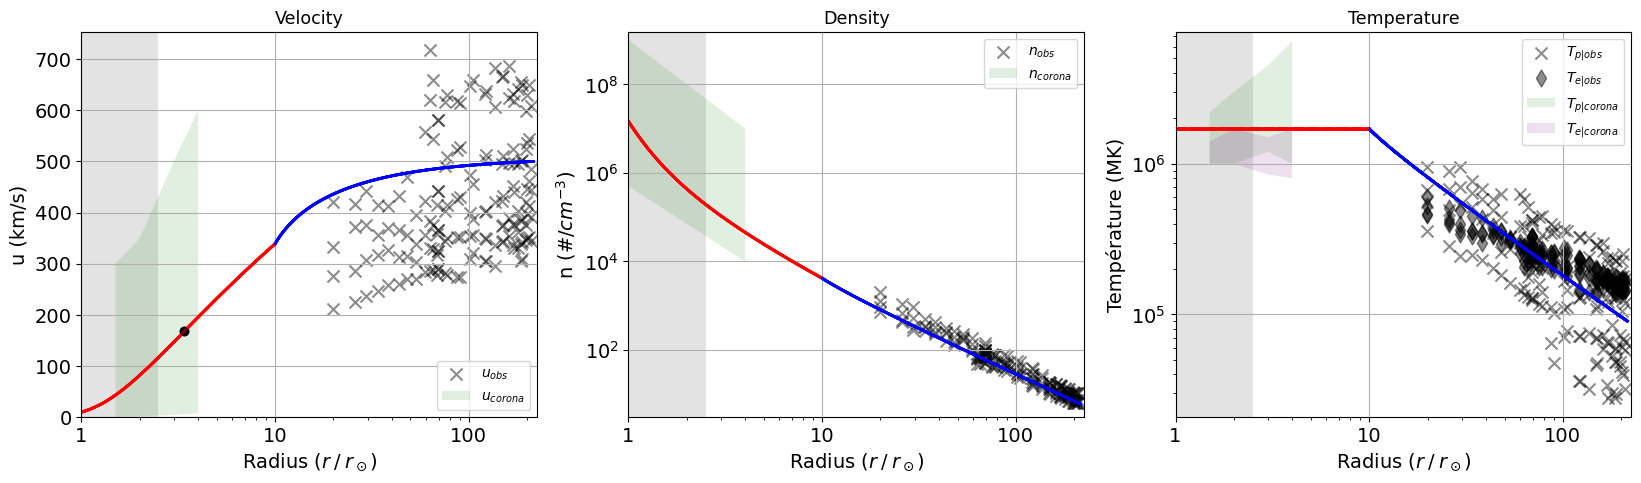

In [9]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 5
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = 1.45
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = np.ones((nb_curves)) * 1.7e6
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = np.ones((nb_curves)) * 10
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = [1, 1, 1, 1, 1]
r_exp = np.ones((nb_curves)) * 1.9          # in solar radii
sig_exp = np.ones((nb_curves)) * 0.1       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

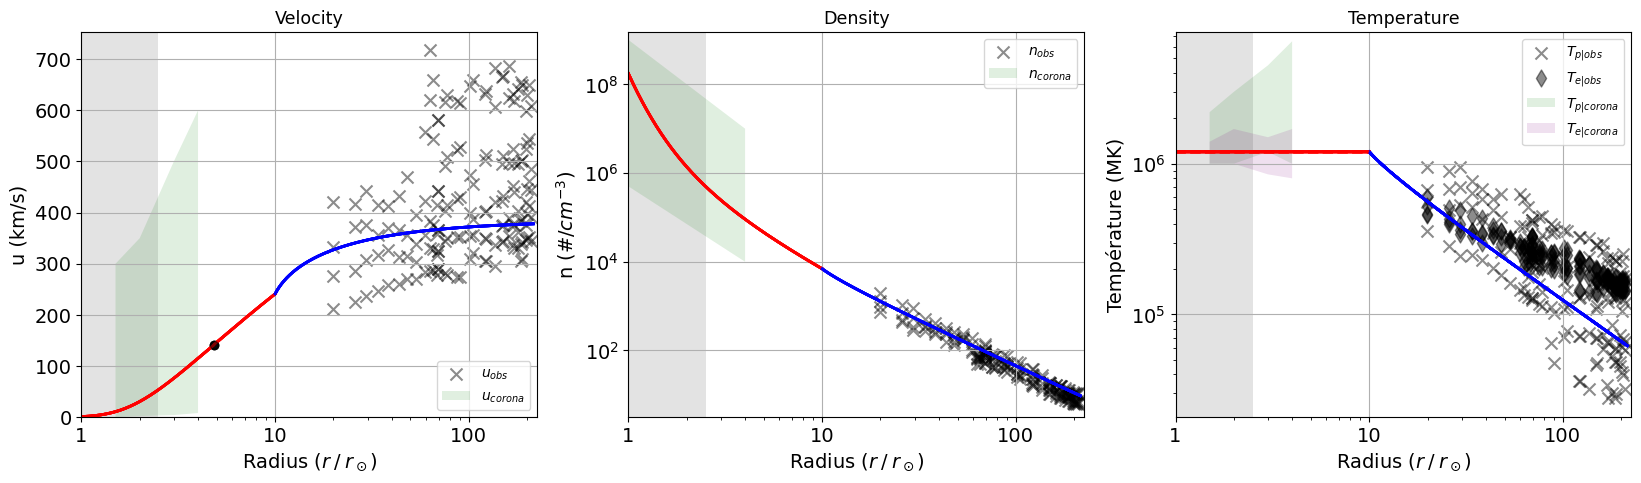

In [10]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 5
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = 1.45
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = np.ones((nb_curves)) * 1.2e6
Tec = Tpc

# Isothermal radius (in solar radii)
r_iso_p = np.ones((nb_curves)) * 10
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = [1, 1, 1, 1, 1]
r_exp = np.ones((nb_curves)) * 1.9          # in solar radii
sig_exp = np.ones((nb_curves)) * 0.1       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

# 4.1) Practical case : Radial alignment

In this section, we use the code to fit observations from a radial alignment between Parker Solar Probe and Solar Orbiter, at which the same parcel of plasma has been observed (Rivera et al. 2025). During its evolution the plasma parameters change, thus the goal here is to model this radial evolution. 

## Radial alignment wind properties (Section 4)
In the original study, the authors fit the observations by an twofluid isopoly curve (without super-expansion).
This pratical case aim first to reproduce the isopoly curve presented in the study, then refine the modeling considering a more refined twofluid isopoly inputs, and the super expansion of the magnetic flux tube.  

We are focusing on the modeling part, the measurements from Rivera et al. 2025 displayed on the plot are summarized in the following table :
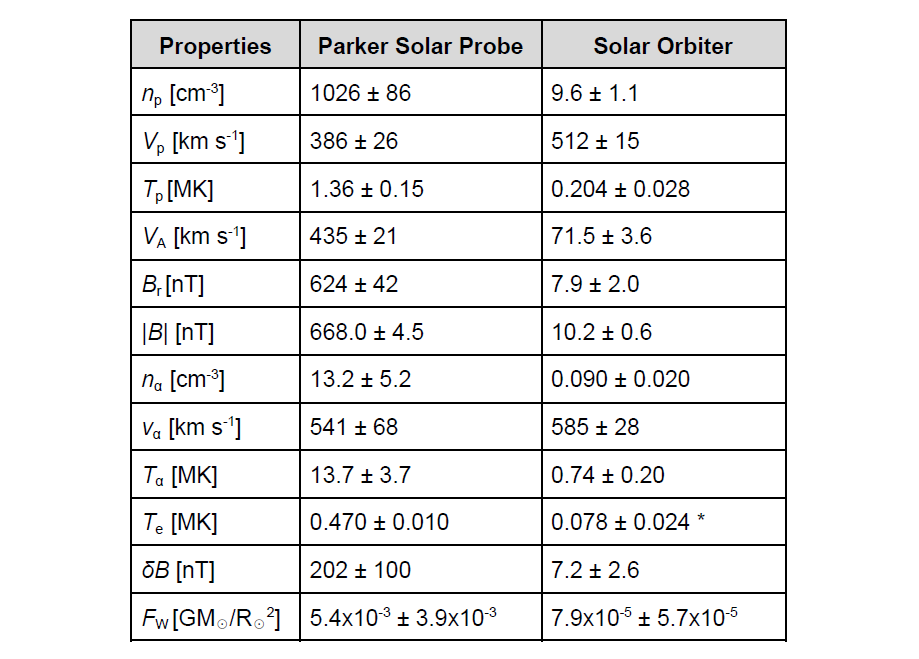
These wind properties are considered here as target values, to fit (as good as possible) in this session.


**Question 1 :** Reproduce the slow Alfvènic wind curves shown in Rivera et al. 2025 using an isopoly twofluid with $r_{iso|p} \: = \: r_{iso|e}$, with no super-expansion ($f_m=1$), and fitting in priority the wind measurements at PSP (you can take the input values from the paper!). Comment the speed modeled at PSP and SolO radial location.

**Question 2 :** Starting from the parameters of Question 1, try to fit the observations now considering that $r_{iso|p} \: \neq \: r_{iso|p}$ with a twofluid isopoly modeling. Comment the change of of wind profiles, and effect in this case to separate the vaues of $r_{iso|p}$ and $r_{iso|e}$.

**Question 3 :** Mapping the origin of the wind stream from PSP, the slow Alfvènic stream is originating a source region with a median expansion factor of $f_m \approx 25$, with typical expansion height $r_{exp} \approx 0.05 r_\odot$ and expansion length of $\sigma_{exp} \approx 1.7 r_\odot$. Add the super-expansion to the two-fluid modeling considering $r_{iso|p} \: = \: r_{iso|e}$. If necessary, modify the other input parameters (other than the super expansion parameters) to fit the observations. Comment the speed modeled at PSP and SolO radial location, and the modeled coronal temperatures $T_{p0}$ and $T_{e0}$.

**Question 4 :** Same as Question 4 with $r_{iso|p} \: \neq \: r_{iso|e}$. Comment the change of of wind profiles with the previous question, and the effect in this case to separate the values of $r_{iso|p}$ and $r_{iso|e}$. 

**Question 5 :** Compare the role of changing $r_{iso|p} \: = \: r_{iso|e}$ to $r_{iso|p} \: \neq \: r_{iso|e}$ between Question 1 & 2 (without super-expansion $fm=1$), and Question 3 & 4 (with super-expansion). What can you say about the thermodynamic description details brought by the super expansion regarding the species evolution ? 

**Question 5 :** What do you think regading all the above questions of this section, of the accuracy of the isothermal assumption close to the Sun when comparing to spectroscopic temperature measurements (shaded area) ? Comment/think about a possible improvment(s) of the model first thermal regime to better match the observations. 

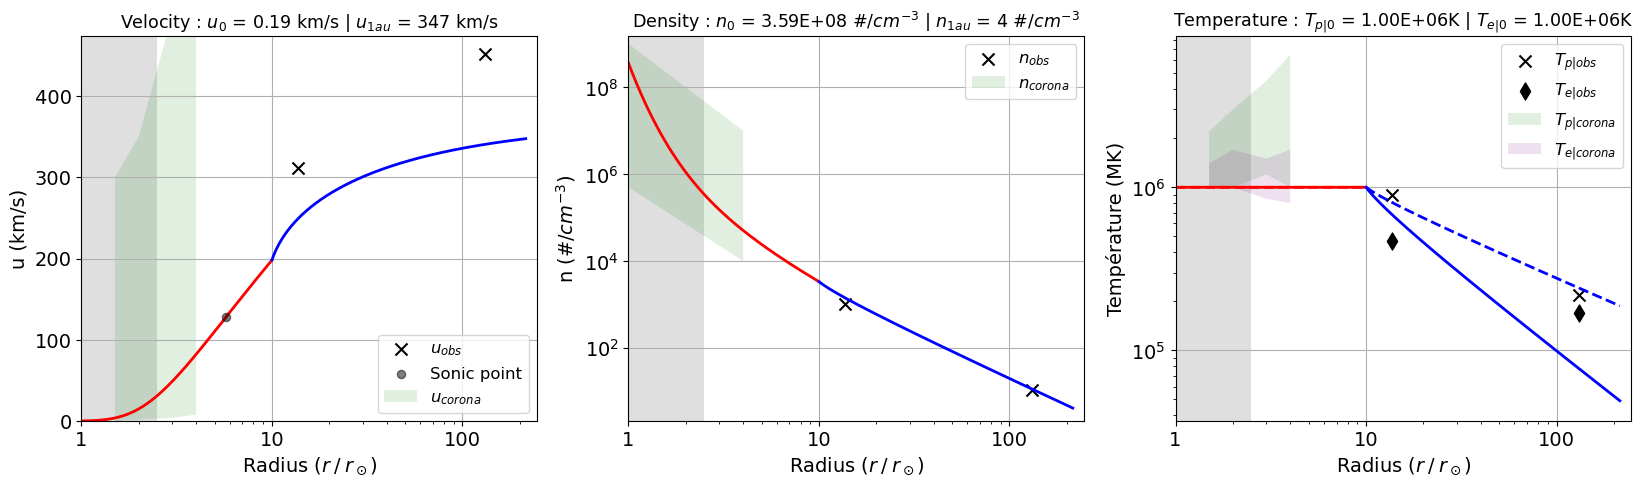

In [11]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1, 1.45]
gamma_e_vals = [1, 1.25]

# Coronal temperature (in Kelvin)
Tpc = 1e6
Tec = 1e6

# Isothermal radius (in solar radii)
r_iso_p = 10 
r_iso_e = r_iso_p

# Expansion factor parameters
fm = 1
r_exp = 1.7          # in solar radii
sig_exp = 0.1       # in solar radii

#########################################
# Data to plot : Rivera et al. 2025

r_data_RA  = [13.7, 130.6]
u_data_RA = [ 311, 451]
n_data_RA = [1043, 11]
Tp_data_RA = [ 9e5, 2.2e5]
Te_data_RA = [ 4.7e5, 1.7e5]
data = np.column_stack(( r_data_RA , u_data_RA, n_data_RA, Tp_data_RA, Te_data_RA ))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

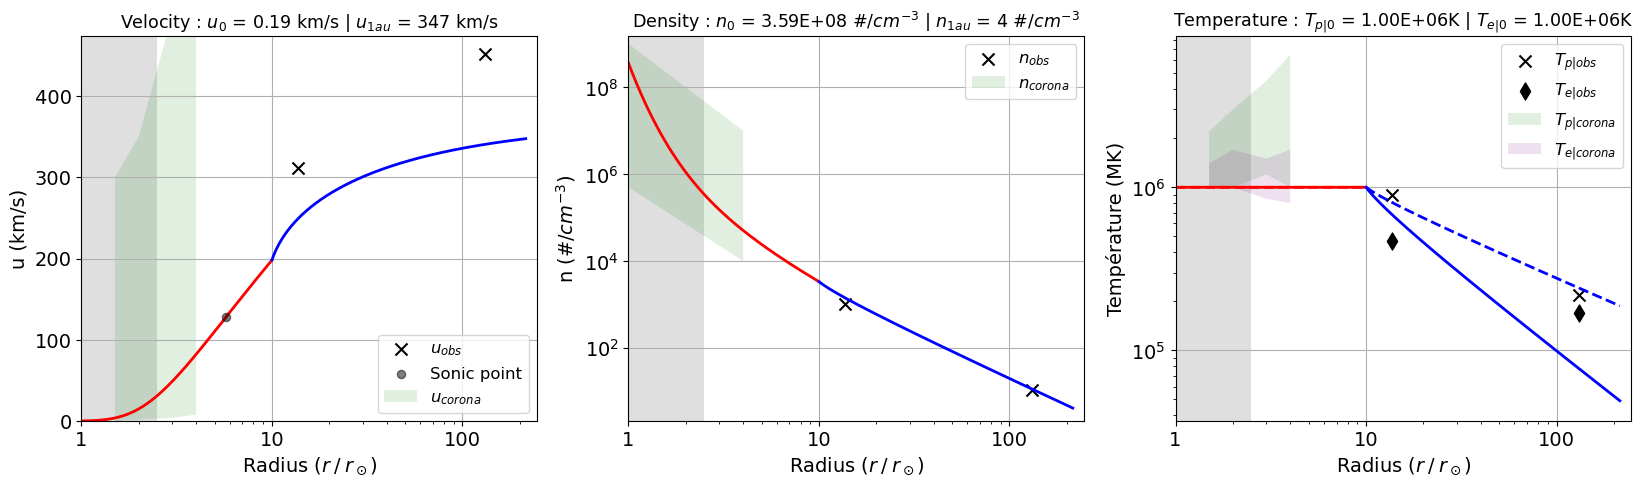

In [12]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1, 1.45]
gamma_e_vals = [1, 1.25]

# Coronal temperature (in Kelvin)
Tpc = 1e6
Tec = 1e6

# Isothermal radius (in solar radii)
r_iso_p = 10 
r_iso_e = 10

# Expansion factor parameters
fm = 1
r_exp = 1.7          # in solar radii
sig_exp = 0.1       # in solar radii

#########################################
# Data to plot : Rivera et al. 2025

r_data_RA  = [13.7, 130.6]
u_data_RA = [ 311, 451]
n_data_RA = [1043, 11]
Tp_data_RA = [ 9e5, 2.2e5]
Te_data_RA = [ 4.7e5, 1.7e5]
data = np.column_stack(( r_data_RA , u_data_RA, n_data_RA, Tp_data_RA, Te_data_RA ))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

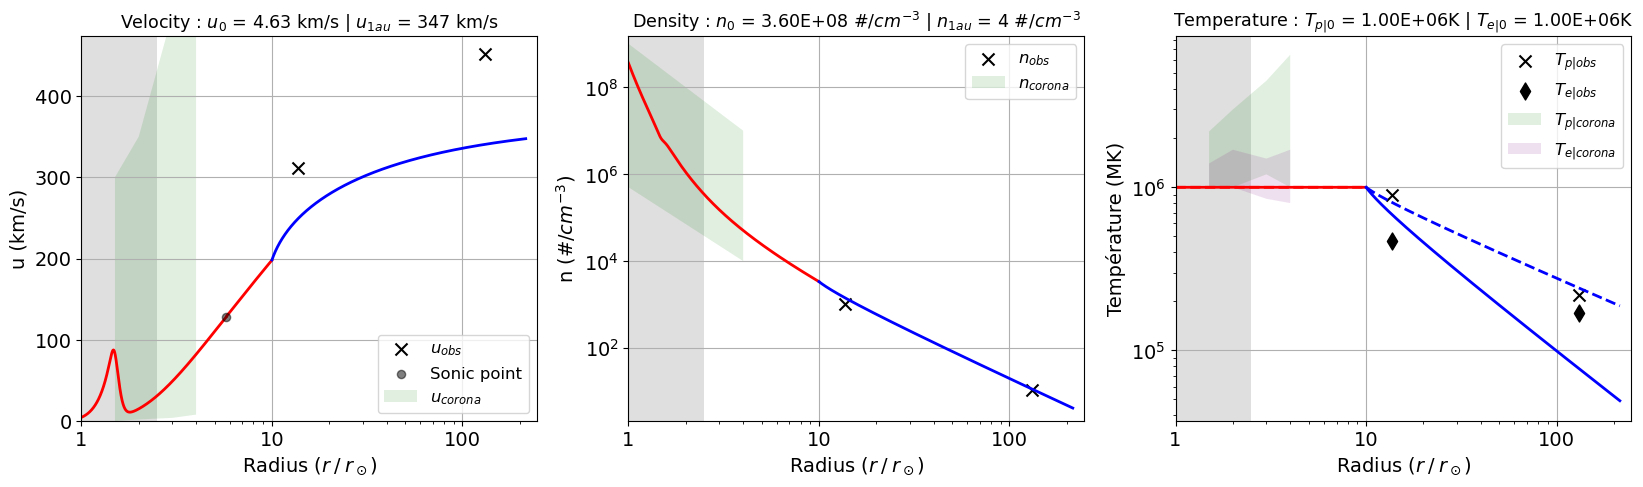

In [13]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1., 1.45]
gamma_e_vals = [1., 1.25]

# Coronal temperature (in Kelvin)
Tpc = 1e6
Tec = 1e6

# Isothermal radius (in solar radii)
r_iso_p = 10 
r_iso_e = r_iso_p 

# Expansion factor parameters
fm = 25
r_exp = 1.7          # in solar radii
sig_exp = 0.05       # in solar radii

#########################################
# Data to plot : Rivera et al. 2024

r_data_RA  = [13.7, 130.6]
u_data_RA = [ 311, 451]
n_data_RA = [1043, 11]
Tp_data_RA = [ 9e5, 2.2e5]
Te_data_RA = [ 4.7e5, 1.7e5]
data = np.column_stack(( r_data_RA , u_data_RA, n_data_RA, Tp_data_RA, Te_data_RA ))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

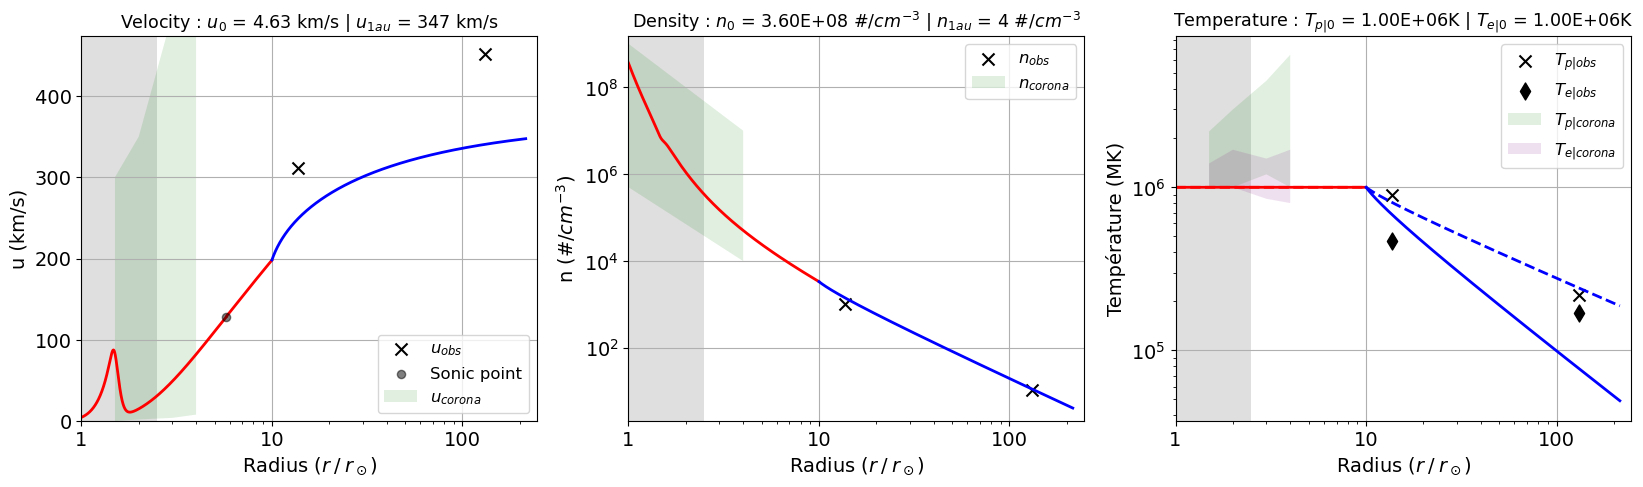

In [14]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1., 1.45]
gamma_e_vals = [1., 1.25]

# Coronal temperature (in Kelvin)
Tpc = 1e6
Tec = 1e6

# Isothermal radius (in solar radii)
r_iso_p = 10 
r_iso_e = 10 

# Expansion factor parameters
fm = 25
r_exp = 1.7          # in solar radii
sig_exp = 0.05       # in solar radii

#########################################
# Data to plot : Rivera et al. 2024

r_data_RA  = [13.7, 130.6]
u_data_RA = [ 311, 451]
n_data_RA = [1043, 11]
Tp_data_RA = [ 9e5, 2.2e5]
Te_data_RA = [ 4.7e5, 1.7e5]
data = np.column_stack(( r_data_RA , u_data_RA, n_data_RA, Tp_data_RA, Te_data_RA ))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_iso_p, r_iso_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

## 5.1) Bipoly solar wind (--Extra--)

It exists a generalized version of the isopoly modeling called "bipoly" modeling. It embeds the same basis of assumptions (two fluid, two thermal regimes), but instead of taking the first thermal regime as isothermal, the condition is relaxed to account instead another polytropic regime with $0 < \gamma < 5/3$. 

**Question 1 :** _For simplicity in this explorative case, we are considering a monofluid_. Explore the effect of the different possible $\gamma$ values on the first thermal regime modifying only this last (between 0.9 and 1.1). Plot all the curve on the same graph. Comment the difference(s) of in speed, density and temperature profiles. 

**Question 2 :** Same as Question 1 adding the influence of the expansion factor with the expansion parameters from the previous Section: $f_m = 72$, $r_{exp} = 2.1$ and $\sigma_{exp}=0.1$. Explore the effect of the different $\gamma$ values for the first thermal regime (between 0.9 and 1.0) modifying only this last. Comment the effect of the expansion factor in the bipoly speed, density and temperature profiles. 

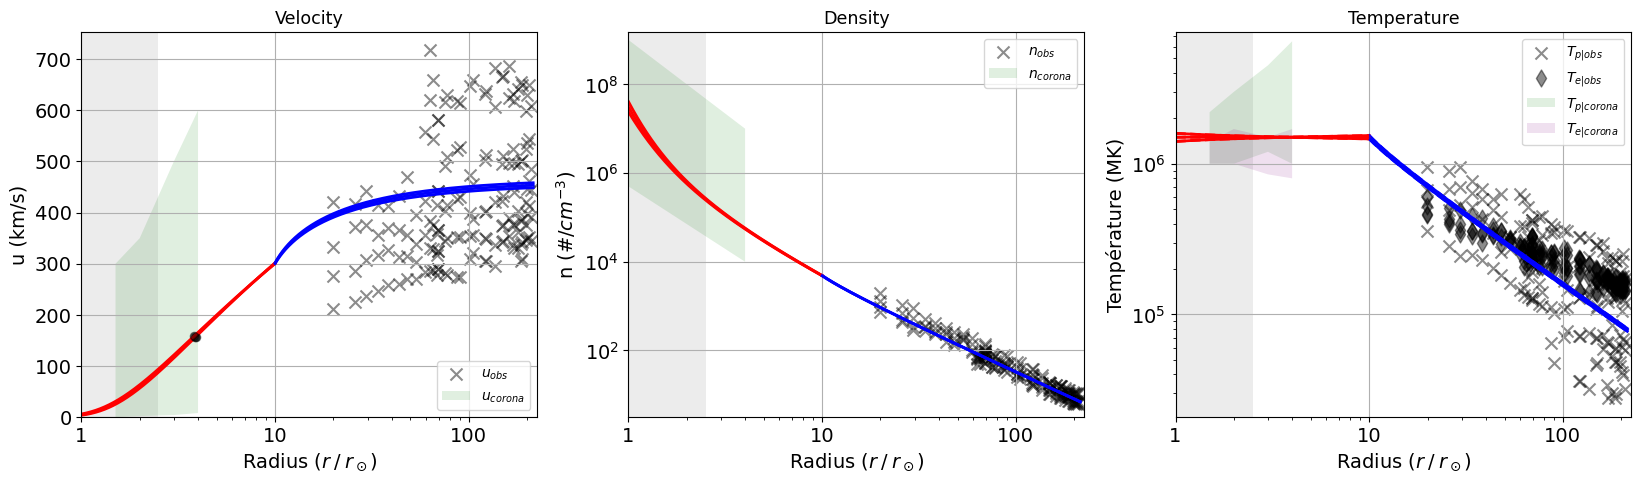

In [15]:
# Plot all the three speed/temperature curves on the same graph.
####################################################
nb_curves = 3
# Length of the output model
N = 1e4
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = np.ones((nb_curves,2)) 
gamma_p_vals[:,1] = 1.45
gamma_p_vals[:,0] = [ 0.99 , 1, 1.01 ]
gamma_e_vals = gamma_p_vals

# Coronal temperature (in Kelvin)
Tpc = np.ones((nb_curves)) * 1.5e6
Tec = Tpc

# Isothermal radius (in solar radii)
r_poly_p = np.ones((nb_curves)) * 10
r_poly_e = r_poly_p 

# Expansion factor parameters
fm = np.ones((nb_curves)) * 1
r_exp = np.ones((nb_curves)) * 1.7          # in solar radii
sig_exp = np.ones((nb_curves)) * 0.05       # in solar radii

###############################################################
# Running the main function
mbpsw.multi_solve_plot(N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, data_all, plot_data, plot_unT)
###############################################################

## 5.2) Fast solar wind & bipoly models (--Extra--)

**Question 1 :** Fit the fastest wind popuation of Dakeyo et al. 2022 playing with the inputs, and setting $\gamma_p = 1.35$ and $\gamma_e = 1.21$, and what corresponds to a typical coronal hole expansion with $f_m = 10$, $r_{exp} = 1.8 \: r_\odot$ and $\sigma_{exp} = 0.1 \: r_\odot$. Comment the coronal temperature, regarding the remote sensing observations. 

**Question 2 :** Same as Questin 1 , for $f_m = 60$, $r_{exp} = 0.05 \: r_\odot$ and $\sigma_{exp} = 1.7 \: r_\odot$, which is more characteristic the super expansion of the border of an active. 

**Question 3 :** Compare repectively $T_{p|min}$ and $T_{p|max}$ that you have obtained respextively at Question 1 & 2, and comment the required increase of temperature to fit the wind speed depending the expansion factor. 

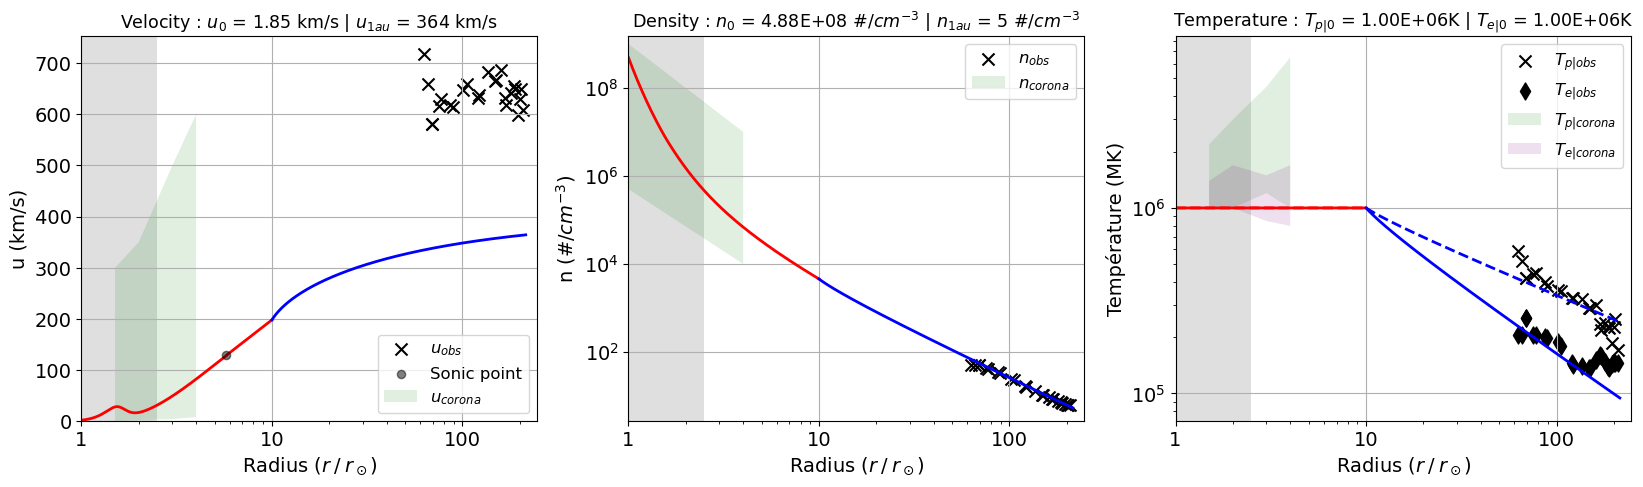

In [16]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1, 1.35]
gamma_e_vals = [1, 1.21]

# Coronal temperature (in Kelvin)
Tpc = 1e6
Tec = 1e6

# Isothermal radius (in solar radii)
r_poly_p = 10 
r_poly_e = 10 

# Expansion factor parameters
fm = 10
r_exp = 1.8          # in solar radii
sig_exp = 0.1       # in solar radii


##########################################################"
# Loading observations HELIOS and PSP
choix_fam = 4 # Fast solar wind from Dakeyo et al. 2022
data = np.column_stack((r_data , u_data[:,choix_fam], n_data[:,choix_fam],
                        Tp_data[:,choix_fam], Te_data[:,choix_fam]))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

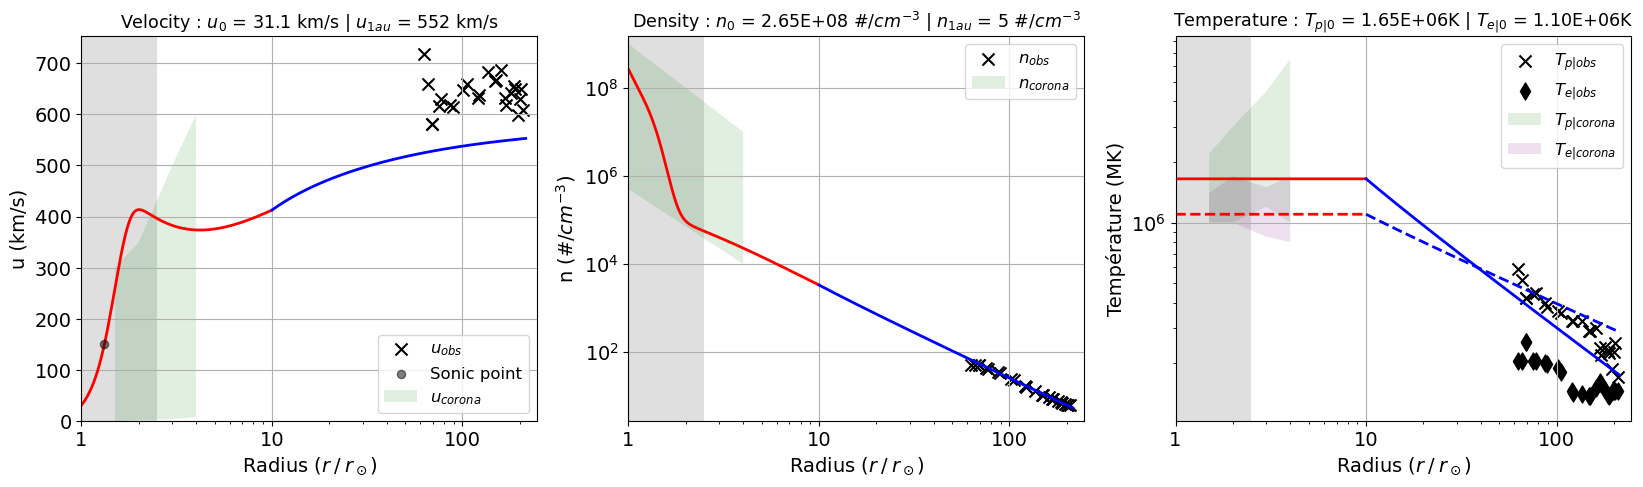

In [17]:
# This portion of code allow to see the values at r0 and 1au of u, Tp, Te and n
# while the the other portion of code aim to do multiplot

#########################################
# Plotting option 
plot_data = True
#########################################

# Inputs of the model 
#########################################
# Length of the output model
N = 5e3
L = 1.496e11      # set to 1au by default

# Polytropic indexes
gamma_p_vals = [1, 1.35]
gamma_e_vals = [1, 1.21]

# Coronal temperature (in Kelvin)
Tpc = 1.65e6
Tec = 1.1e6

# Isothermal radius (in solar radii)
r_poly_p = 10 
r_poly_e = 10 

# Expansion factor parameters
fm = 60
r_exp = 1.8          # in solar radii
sig_exp = 0.1       # in solar radii


##########################################################"
# Loading observations HELIOS and PSP
choix_fam = 4 # Fast solar wind from Dakeyo et al. 2022
data = np.column_stack((r_data , u_data[:,choix_fam], n_data[:,choix_fam],
                        Tp_data[:,choix_fam], Te_data[:,choix_fam]))

###############################################################
# Running the main function
(r, n, u, Tp, Te, gamma_p, gamma_e, ind_rc, f, bol_super) = bpsw.solve_bipoly(
                                        N, L, gamma_p_vals, gamma_e_vals, 
                                        Tpc, Tec, r_poly_p, r_poly_e,
                                        fm, r_exp, sig_exp, plot_f, 
                                        plot_gamma, plot_unT, 
                                        plot_energy, data, plot_data)
###############################################################

## Inputs values recommandations
The values of the inputs affect the existence of a solar wind solution. In order to be as easy as possible in the case of an existing of solution, we provide here values interval for which the numerical resolution can operate nicely. The values are indicative and do not represent a strict interval for the existence of a solar wind solution. However, if all values are already in the interval, increasing the number of points of the output vector up to $N = 10^5$ may help to find an existing solar wind solution.

$$
\left\{
    \begin{array}{c}
        N \geq 10^3 \quad \text{for} \quad L = 1au \\
        0.75 \: \leq \: (\gamma_p, \gamma_e) \: \leq \: 5/3 \\
         0.5 \: \text{MK} \: \lesssim \: (T_{p0}, T_{e0}) \: \lesssim \: 7 \: \text{MK} \\
         1.05 \times r_c \: \lesssim \: (r_{iso|p}, r_{iso|e}) \: \lesssim \: 25 \: r_\odot
    \end{array}
\right.
$$